# Advanced Machine Learning

## Bootstrapping

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
# generate a population 
np.random.seed(2020)
pop = np.random.randint(0,500 , size=100)
pop

array([352, 392, 323, 118, 195,  91, 125, 131,  71, 440, 157,  48, 160,
       408, 458, 265, 179, 139,  55, 114, 446, 195, 358, 325,  48, 156,
       148, 136, 294, 468, 193, 385,  79, 325, 458, 329,  62,  21,  29,
        90, 262, 166, 150, 447, 149, 196, 134, 238, 484, 354, 131,  20,
        55, 385, 308, 265, 339,  82, 112, 121,  65, 426, 322, 439,  33,
        80, 466, 200, 222, 475, 270, 232, 142, 203, 389, 294, 211, 355,
        10,  80, 320, 335,  30, 212, 278,  46, 410, 444, 382, 246,  13,
        24,  63, 153, 217, 383, 137,  69, 241, 431])

In [3]:
# population mean
pop.mean()

225.12

In [4]:
# population standard deviation
pop.std()

140.18732325000002

### Single sample

In [5]:
# draw a sample from population
sample_size= 30
sample = np.random.choice(pop, size=sample_size)
sample

array([246, 265, 294,  21, 179, 265, 112, 325, 114,  90, 131,  21, 121,
       352, 160,  79,  48, 265, 200, 118,  62, 355, 125, 149, 238, 217,
       203, 355, 195, 355])

In [6]:
# our first sample mean
sample_mean = sample.mean()

# Sample mean
sample_mean

188.66666666666666

In [7]:
# standard deviation for this sample
sample_std = np.std(sample, ddof=1)

#Sample SD
sample_std

103.1317648425558

In [8]:
#standard error (SE) of a statistic is the standard deviation of its sampling distribution
#estimated standard error for our sample mean is
sample_std/(sample_size ** 0.5)

18.82919799986201

### Simulation using sampling distributions

In [9]:
# construct the simulated sampling distribution
sample_props = []
for _ in range(100000):
    sample = np.random.choice(pop, size=sample_size,replace=False)
    sample_props.append(sample.mean())

In [10]:
# the simulated mean of the sampling distribution
simulated_mean = np.mean(sample_props)

In [11]:
# the simulated standard deviation of the sampling distribution
simulated_std = np.std(sample_props)

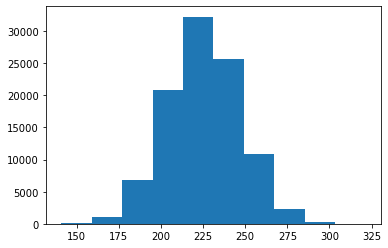

In [12]:
# plot the simulated sampling distribution,
# under the Central Limit Theorem, it is expected normal
plt.hist(sample_props)
plt.show()

In [13]:
# the theorical mean and simulated mean
(pop.mean(), simulated_mean)

(225.12, 225.27839000000003)

In [14]:
# the theorical standard error and simulated standard error
(pop.std()/(sample_size ** 0.5), simulated_std)

(25.59458640676448, 21.519440216983906)

### Bootstrap Samples

In [15]:
sample = np.random.choice(pop, size=sample_size)
sample

array([212, 131, 389, 389,  71, 153, 156,  62, 339,  20,  80, 118,  21,
       157, 446,  79,  79, 431,  30, 270, 325, 446, 447, 238, 246, 323,
       232, 382, 458, 484])

In [16]:
# bootstrap for mean
boot_means = []
for _ in range(100000):
    boot_sample = np.random.choice(sample,size=sample_size, replace=True)
    boot_means.append(boot_sample.mean())

In [17]:
# simulated mean of means
boot_mean = np.mean(boot_means)

In [18]:
# simulated standard deviation of mean
boot_mean_std = np.std(boot_means)

In [19]:
# true mean vs simulated mean
(pop.mean(), boot_mean)

(225.12, 240.59708300000005)

In [20]:
# the theorical standard error and simulated standard error
(pop.std()/(sample_size ** 0.5), boot_mean_std)

(25.59458640676448, 27.6532348546141)

#### Sklearn API

In [21]:
# using sklearn
boot = resample(pop, replace=True, n_samples=sample_size, random_state=1)
print('Bootstrap Sample: %s' % boot)

# out of bag observations
oob = [x for x in pop if x not in boot]
print('\nOOB : %s' % oob)

Bootstrap Sample: [ 21 160 142 440 294  91  80  33 179 392 211 232 125 156 131 446  55 278
  48 294 468 458 131 222 444 444 217 137 410 408]

OOB : [352, 323, 118, 195, 71, 157, 265, 139, 114, 195, 358, 325, 148, 136, 193, 385, 79, 325, 329, 62, 29, 90, 262, 166, 150, 447, 149, 196, 134, 238, 484, 354, 20, 385, 308, 265, 339, 82, 112, 121, 65, 426, 322, 439, 466, 200, 475, 270, 203, 389, 355, 10, 320, 335, 30, 212, 46, 382, 246, 13, 24, 63, 153, 383, 69, 241, 431]
